<a href="https://colab.research.google.com/github/pedr19faria/Boltzmann-Distribution/blob/main/Boltzmann.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
### Importing the functions we will use
import numpy as np
import matplotlib.pylab as plt
%matplotlib inline
from matplotlib import animation
from matplotlib.animation import PillowWriter
from itertools import combinations

In [2]:
### Creating the molecules randomly
n_particles = 250
part = np.random.random((2, n_particles ))
part ### part[0] will represent the x-axis position and part[1] the y-axis position
part_index = np.arange(n_particles)
pair_index = np.asarray(list(combinations(part_index,2))) ### Combination of all indexes as a array


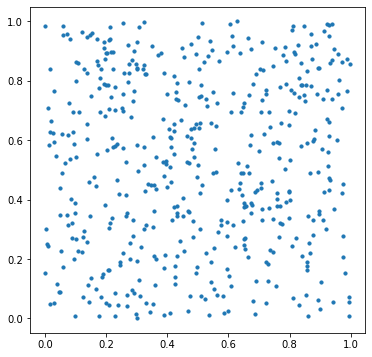

In [ ]:
fig, ax = plt.subplots(1,1, figsize = (6,6))

plt.scatter(part[0], part[1], s = 10)
### Here is the representation of these particles on a graph

In [3]:
vel = np.ones((2,n_particles)) ### Average velocity of particle in ideal gas, as given by the Boltzmann Distribution for T= 300K
vel[0] = vel[0]*554
vel[1] = vel[1] * 0

for i in range(len(part[0])):
  if part[0][i] > 0.5:
        vel[0][i] = -554 ### Here now all the particles on the right hand size will move toward the left and the ones on the left to the right

The 

```
# combinations()
```
function serves as a tool to make all possible combinations between all elements without any repetition. In this case it will make it possible for the code to check the distance between all particles from one another. 


In [64]:
### Create a function that will tell you if the particles will collide:
def collision(part):
  x_pos = np.diff(np.asarray(list(combinations(part[0], 2))), axis = 1).flatten()
  y_pos = np.diff(np.asarray(list(combinations(part[0], 2))), axis = 1).flatten()
  dist = np.sqrt((x_pos)**2 + (y_pos)**2)
  return dist ### dist will be a list with the distance between all particles

def new_velocity(v1, v2, d1, d2):
  v1_new = v1 - ((np.diag((v1-v2).T@(d1-d2))/np.sum((d1-d2)**2, axis=0)) * (d1-d2))
  v2_new = v2 - ((np.diag((v2-v1).T@(d2-d1))/np.sum((d2-d1)**2, axis=0)) * (d2-d1))
  return v1_new, v2_new

def motion(part, vel, temp, dt, pairs, raio = 30e-3):
  pos = np.zeros((temp, part.shape[0], part.shape[1])) ### [1000 matrices with 2 lines and 32 collums]
  v = np.zeros((temp, vel.shape[0], vel.shape[1]))

  pos[0] = part.copy() 
  v[0] = vel.copy()
  for i in range(1,temp):
     ## boolean array with all molec. information about if it will collide or not
    index_dist = pairs[collision(part) < 2*raio] ### Indexes of the pairs that will colide
    ### i want to recalculate the velocity of those molec that have touched each other
    vel[:, index_dist[:,0]], vel[:, index_dist[:,1]] = new_velocity(vel[:, index_dist[:,0]],vel[:, index_dist[:,1]], part[:, index_dist[:,0]],part[:, index_dist[:,1]]  )

    vel[0,part[0]>1] = -np.abs(vel[0,part[0]>1])
    vel[0,part[0]<0] = np.abs(vel[0,part[0]<0])
    vel[1,part[1]>1] = -(vel[1,part[1]>1])
    vel[1,part[1]<0] = -(vel[1,part[1]<0])   


    part = part + vel*dt
    pos[i] = part.copy()
    v[i] = vel.copy()   

  return pos, v 


In [65]:
n_particles = 200
part = np.random.random((2, n_particles ))
part ### part[0] will represent the x-axis position and part[1] the y-axis position
part_index = np.arange(n_particles)
pair_index = np.asarray(list(combinations(part_index,2))) ### Combination of all indexes as a array
vel = np.ones((2,n_particles)) ### Average velocity of particle in ideal gas, as given by the Boltzmann Distribution for T= 300K
vel[0] = vel[0]*500
vel[1] = vel[1] * 0

for i in range(len(part[0])):
  if part[0][i] > 0.5:
        vel[0][i] = -500 ### Here now all the particles on the right hand size will move toward the left and the ones on the left to the right

In [66]:
posit, v = motion(part, vel, 1000, 8e-6, pair_index)


Now that we have two arrays with the positions and the velocities we can make the animation that shows the molecules moving:

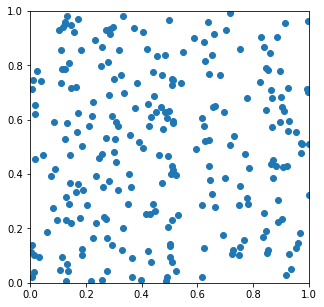

In [ ]:
fig, ax = plt.subplots(1,1,figsize=(5,5))
x_molec, y_molec = posit[0][0], posit[0][1]
ax.set_xlim(0,1)
ax.set_ylim(0,1)
plt.scatter(x_molec, y_molec)
plt.show()


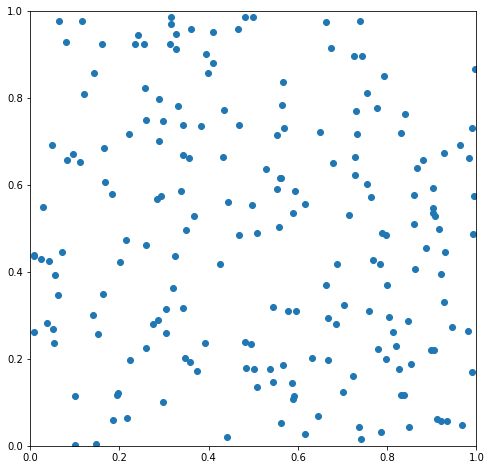

In [63]:
fig, ax = plt.subplots(1,1, figsize = (8,8))
def animate(i):
  ax.clear()
  ax.scatter(posit[i][0], posit[i][1])
  ax.set_xlim(0,1)
  ax.set_ylim(0,1)


ani = animation.FuncAnimation(fig, animate, frames=500, interval=50)
ani.save('ani3.gif',writer='pillow',fps=12)


In [97]:
vh = np.linspace(0,2000, 1000)
c = 1/(554**2)
fv = 2*c*(vh)*np.exp(-c*((vh**2)))


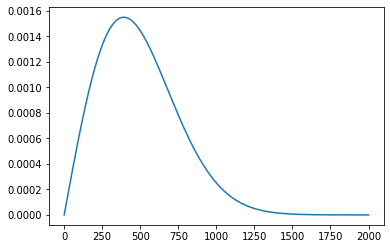

In [98]:
plt.plot(vh,fv)

(-50.0, 2000.0)

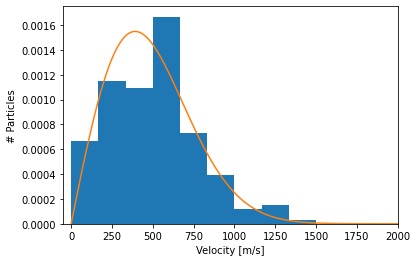

In [99]:
bins = np.linspace(0,1500,10)
plt.figure()
plt.hist(np.sqrt(np.sum(v[-1]**2, axis=0)), bins=bins, density=True)
plt.plot(vh,fv)
plt.xlabel('Velocity [m/s]')
plt.ylabel('# Particles')
plt.xlim(-50,2000)

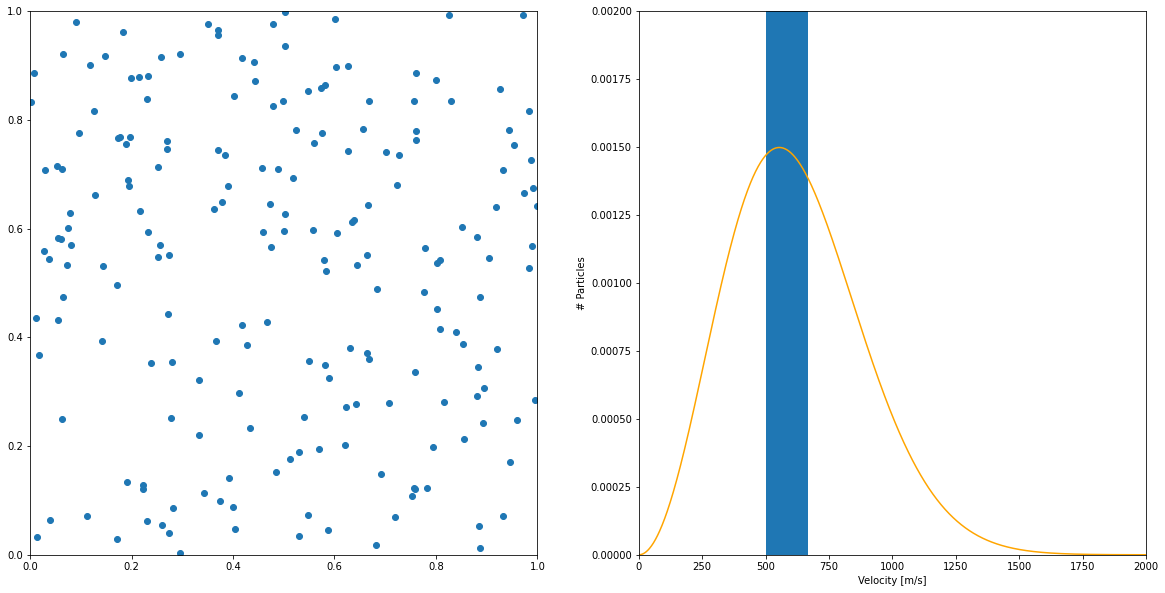

In [77]:
fig, ax = plt.subplots(1,2, figsize = (20,10))

def animate(i):
  [ax.clear() for ax in ax]
  ax1 = ax[0]
  ax2 = ax[1]
  ax1.scatter(posit[i][0], posit[i][1])
  ax1.set_xlim(0,1)
  ax1.set_ylim(0,1)  
  ax2.hist(np.sqrt(np.sum(v[i]**2, axis=0)), bins=bins, density=True)
  ax2.plot(vh,fv, c='orange')
  ax2.set_xlabel('Velocity [m/s]')
  ax2.set_ylabel('# Particles')
  ax2.set_xlim(0,2000)
  ax2.set_ylim(0,0.0020)






ani = animation.FuncAnimation(fig, animate, frames=500, interval=50)
ani.save('ani.gif',writer='pillow',fps=12)
